## **Matthew Takeuchi Mini Project**

In [ ]:

#Bringing in all libraries to be used
import numpy as np
import pandas as pd
import matplotlib as plot
import seaborn as sns

In [ ]:
#Reading the data
url = "https://drive.google.com/uc?export=download&id=1PcCyXXs28wvhAcatjBqa48hf9JD8_Xqa"
df = pd.read_csv(url)

**1. High Level View**



In [ ]:
print(df.shape)
print(df.head())
print(df.info)
print(df.describe())

(157, 13)
       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2      

The data appears to be categorizing and ranking countries based on Happiness, their Economy, Life Expectancy, Freedom, Trust, and Generosity amongst others. The data seems perfect for a multi variable analysis to look at the correlation of multiple factors a country has to determine a given output. There are some variables that are confusing such as Dystopia Residual, which do not have context and make them difficult for analyzing sufficiently.

**2. Preliminary Exploration**

In [ ]:
print(df.isnull().sum())
#df.describe()
filtered_df = df[(df['Happiness Score'] >= df['Lower Confidence Interval']) & (df['Happiness Score'] <= df['Upper Confidence Interval'] )]
print(filtered_df['Happiness Score'].count())
print(df.columns[df.min() == 0])

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
157
Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')


There are many different data types present in the csv. THere are categorical data such as Region, while others appear to be on a sort of sliding scale or porpotion. There are quite a few values that do not make sense such as family, which is unclear what the data represents. If it is a proportion, there are values above 1 which wouldn't make sense, and it is not replacement rate since most countries have a replacement rate over 1 in the real world. Additionally, there are some 0 values which appear to just be omitted data. Since the data is omitted, using 0 does seem to be ok, but we should be wary of this when conducting our analysis. For example, the GDP of Somalia is listed as 0, which is untrue. I will assume that they are omitted for this project since it is highly unlikely a country has no GDP, no Freedom, or no Trust, to name a few.

The first check I wanted to do was to see how many NULL values there were in the data. This is important as NULL values indicate potential errors in the data collection process, possibly skewing the results. There are no NULL values.

>


The second thing I was interested in checking was to see how many Happiness scores fell outside of their confidence interval range. There were 157 rows returned in the new filtered dataframe, which matches that of the original dataframe, indicaitng there were no rows that had happiness scores outside of their confidence interval range. This would imply either the sample taken was not representative of their population, or that the sample might be invalid or bad.

The last thing I wanted to check was to see which columns contained values of 0. There were quite a few columns that had 0s for values. Similar to the reasoning for checking NULL values, 0s can also show omitted data and since it is numerical, during analysis, it can skew the results of the analyses.





**3. Defining Objectives**

a. Given that many people are skeptical of the US govt. despite being one of the most free countries in the world, is **Freedom** correlated with **Trust**?

b. Are the **happiest** countries the **wealthiest** countries?

c. Are higher **happiness** rankings correlated with better **health**?

**4. Findings**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


A. Given that many people are skeptical of the US govt. despite being one of the most free countries in the world, is Freedom correlated with Trust?

Text(0.5, 1.0, 'Scatterplot- Trust vs Freedom')

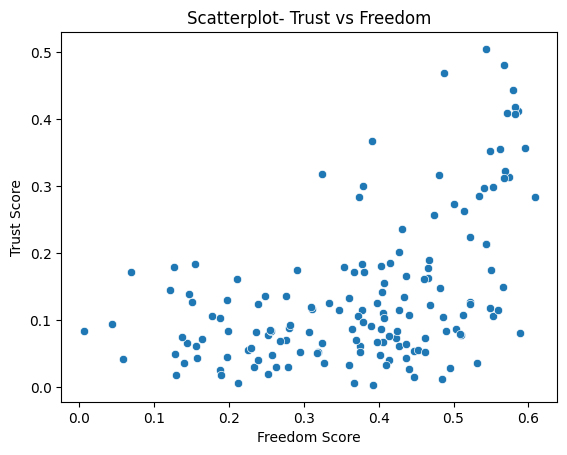

In [ ]:
df_no_zeros = df[(df['Trust (Government Corruption)'] != 0) & (df['Freedom'] != 0)] #filter out all zero values for both to prevent skewness from omitted data
sns.scatterplot(data = df_no_zeros , x = 'Freedom', y = 'Trust (Government Corruption)')
plt.xlabel('Freedom Score')
plt.ylabel('Trust Score')
plt.title('Scatterplot- Trust vs Freedom')


I chose to represent these findings in a scatterplot. A scatterplot helps visualize correlations/associations more easily than other types of charts, which is useful to see either a positive, negative, or no association between these two variables.


From this scatterplot, we can see there is a moderate positive association between these two variables. This might indicate to us that higher Freedom scores can result in higher Trust scores in their gorvernment. These findings do seem to be logical as more restrictive freedom is usually a sign to be wary or untrustful of your government. However, since this is purely correlaitonal, we cannot draw conclusions about one causing the other. This does present an opportunity to further study the relationships of these two variables in a causal way such as through an experiment.

*In conclusion, Freedom is positively correlated with Trust*

B. Are the **happiest** countries the **wealthiest** countries?

Text(0.5, 1.0, 'Are the top 10 Happiest countries in the Top 10 Wealthiest?')

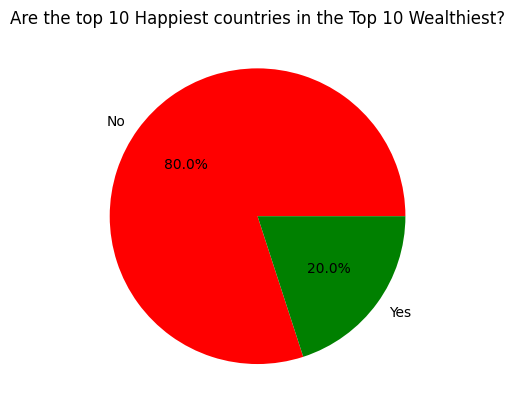

In [ ]:
df_countries_ranked = df.copy() #create new df to avoid modifying original
df_countries_ranked['Wealth Rank'] = df_countries_ranked['Economy (GDP per Capita)'].rank(ascending = False) #add a wealth rank based on GDP
df_countries_ranked['Country wealthy?'] = np.where(df_countries_ranked['Wealth Rank'] <= 10, 'Yes', 'No') #add a Y/N column if a country is wealthy, top 10 countries for wealth
df_countries_ranked['Country happy?'] = np.where(df_countries_ranked['Happiness Rank'] <= 10, 'Yes', 'No') #add a Y/N column if a country is happy, top 10 countries for happiness

df_happiest_countries = df_countries_ranked.sort_values(by = 'Happiness Rank', ascending = True).head(10) #create df of the happiest countries

#df_wealthiest_countries = df_countries_ranked.sort_values(by = 'Wealth Rank', ascending = True).head(10) #create df of just the top 10 wealthiest countries

happiest_countries_counts = df_happiest_countries['Country wealthy?'].value_counts()
happiest_countries_counts.plot.pie(colors = ['red', 'green'], labels = ['No', 'Yes'], autopct='%1.1f%%')
plt.ylabel('')

plt.title('Are the top 10 Happiest countries in the Top 10 Wealthiest?')



I chose to do a pie chart for this question to more easily see the data in a binary way. I only used the top 10 happiest countries since using more data could result in confusion, lack of clarity, and drastic range/variety in happiness scores. Using a different graph than a pie chart would not be as strong for just 10 data points, and the data would be too noisy if we included all countries. I was only interested in seeing if the top 10 happies countries were the wealthiest and was not interested in other countries to resolve this question.

Surprisingly, the top 10 happiest countries are not in the top 10 wealthiest. WHile it may seem proper to assume they would be due to lower financial struggle and stress, this data shows the exact opposite. While we can't draw conclusions from such a small sample, we have other variables we can study in more detail to see if there are other variables that are likely correlated with being in the top happiest countries.

*The data shows on average, the happiest countries are not the wealthiest*

C. Are higher **happiness** rankings correlated with better **health**?

Text(0.5, 1.0, 'Scatterplot- Happiness vs Life Expectancy')

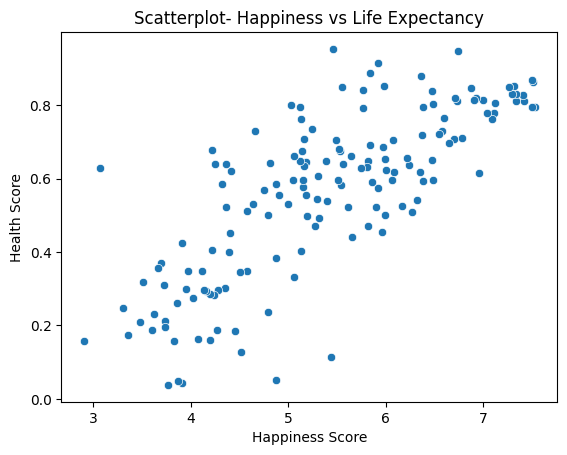

In [ ]:
df_no_zeros_HH = df[(df['Health (Life Expectancy)'] != 0) & (df['Happiness Score'] != 0)] #filter out all zero values for both to prevent skewness from omitted data
sns.scatterplot(data = df_no_zeros_HH , x = 'Happiness Score', y = 'Health (Life Expectancy)')
plt.xlabel('Happiness Score')
plt.ylabel('Health Score')
plt.title('Scatterplot- Happiness vs Life Expectancy')


A scatterplot was chosent o represent this data to show a projected correlation between Happiness and Life Expectancy. I chose this over a heat map to show linearity, something a heat map struggles with.

According to the scatterplot, it does appear that Happiness and Health are positively correlated. Living a happy life usually indicates that you are healthy and have little to no worries, so these variables are likley not independent. Although we can't draw conclusions from this data, the strong positive correlation does imploy these variables should be studied on a causal level to see if a causal link truly does exist.

*Therefore, higher happiness rankings are correlated with better health*

**5. Ethics**

While conducting analysis on the data, there were multiple areas for ethical concern.

Firstly, in many countries, freedoms in general are opressed and talking negatively about a country might be penalized. This would introduce bias into the data as people could be encouraged to respond a given way out of fear.

Secondly, we are not sure of the data collection methods. The measurement scale for most of these can be somewhat determined through deductive reasoning, but it is not for sure clear what the scale is for many of these variables. Some are given a score without us knowing the scale of the score, others are given what look like proportions, and many more. Not knowing the scale makes it harder to deduce conclusions from our findings or put it in real world terms. A good example of this is family, is this replacement rate, a proportion of family bond, or something else?

Lastly, presenting these types of data, specifically when looking at countries which are struggling, can bring about stereotypes. If we found that both a countries' wealth and happiness were correlated, it might seem like certain countries are better than others. There have been many privileges and hardships countries have faced and looking at these numbers and/or visualizations might create stereotypes for a reader, detering them from visiting.

The raw data would be significantly more helpful if it were accompanied by explanations, methods of collection and measurement, and warnings about potential biases it might have.